# Predicting the prices of Avocados

The dataset represents weekly 2018 retail scan for National retail volume (units) and price.Retail scan data comes directly from retailers cash regesters based on actual retail sales od Hass avocados.Starting in 2013. the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, doller and military. The Average Price (of avocado) inthe table reflects a per unit (per avocado) cost, even when multiple units(avocado) are sold in bags. The Product lookup codes (PLU's) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table

Some relevant columns in the dataset

1. Date-The date of the observation
2. AveragePrice-The average price of a single avocado
3. Total Volume-Total number od avocado sold
4. type-conventional or organic
5. year-the year
6. region-the city or region of the observation
7. 4046-Total number of Avocados with PLU 4046 sold
8. 4225-Total number of avocados with PLU 4225 sold
9. 4770-Total number of avocados with PLU 4770 sold

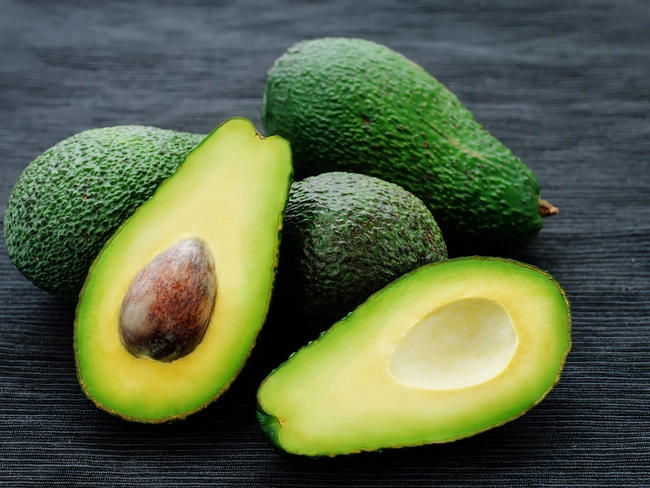

In [6]:
#display image using python
from IPython.display import Image
url = 'https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg'
Image(url,height=300,width=400)

In [8]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#importing the dataset
data = pd.read_csv('avocado.csv',index_col=0)
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [10]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<Axes: xlabel='AveragePrice', ylabel='Density'>

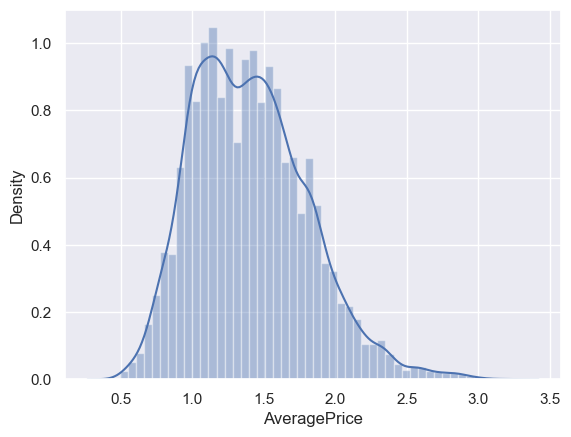

In [12]:
sns.distplot(data['AveragePrice'])

<Axes: xlabel='year', ylabel='count'>

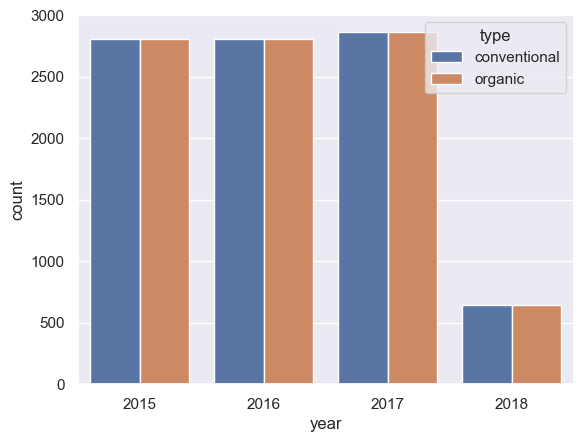

In [14]:
sns.countplot(x='year',data=data,hue='type')

There are almost equal number of conentional and organic avocados. Though, there is very less observations in the year 2018

In [17]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

<Axes: xlabel='AveragePrice', ylabel='type'>

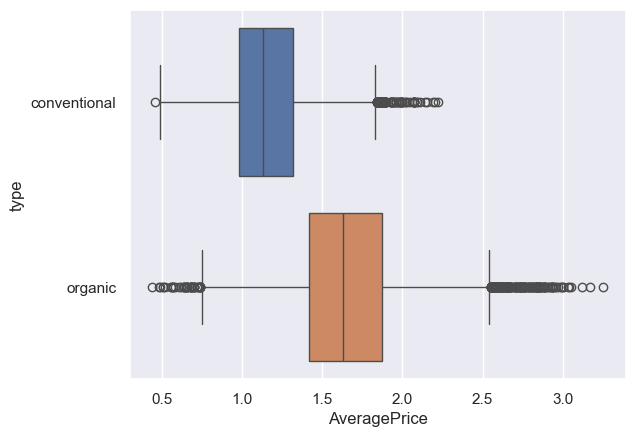

In [24]:
sns.boxplot(y="type",x="AveragePrice",data=data,hue="type")

Organic avocados are more expensive.This is obvious, because their cultivation is more expensive and we will all love natural products and are willing to pay a higher price for them.

<Axes: xlabel='year', ylabel='AveragePrice'>

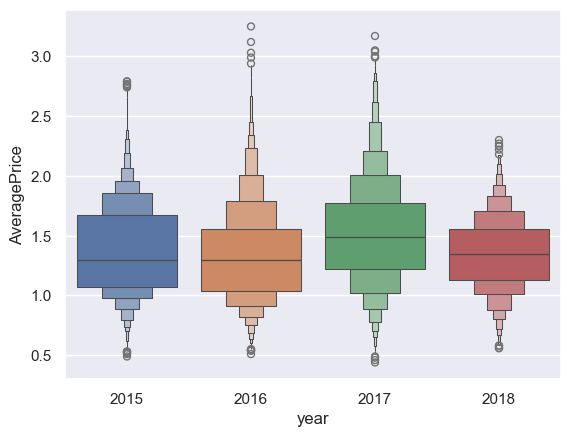

In [26]:
data.year=data.year.apply(str)
sns.boxenplot(x="year",y="AveragePrice",data=data,hue='year')

Avocados were slightly more expensive in the year 2017 (as there was shortage due to some reasons)

# Dealing with categorical features

In [30]:
data['type']= data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

Text(0.5, 1.0, 'Monthwise Distribution of Sales')

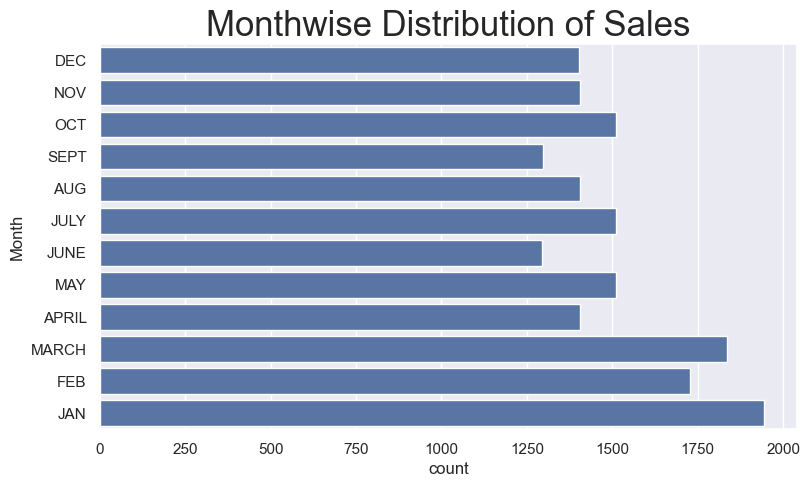

In [32]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25})

It implies that sales of avocado see a rise in January, February, March

# Preparing data for ML model

In [93]:
# 1. IMPORT LIBRARIES
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [85]:
!pip install xgboost

In [95]:
# 2. CREATE DUMMY VARIABLES
# Categorical columns
dummies = pd.get_dummies(
    data[['year', 'region', 'Month', 'type']],
    drop_first=True
)

# Numerical columns
num_cols = [
    'Total Volume', '4046', '4225', '4770',
    'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'
]

# Final feature set
df_dummies = pd.concat([data[num_cols], dummies], axis=1)

# Target
target = data['AveragePrice']


In [140]:
# 3. # Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split( df_dummies, target, test_size=0.30, random_state=42)
                      

In [142]:
# 4. STANDARDIZE NUMERICAL COLUMNS
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


In [148]:
# 5. APPLY ML MODELS (SKLEARN)
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(random_state=42),
    'Random Forest' : RandomForestRegressor(random_state=42),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = pd.DataFrame(columns=['MAE','MSE','R2-score'])

for name, model in regressors.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results.loc[name] = [
        round(mean_absolute_error(y_test, preds), 3),
        round(mean_squared_error(y_test, preds), 3),
        round(r2_score(y_test, preds), 3)
    ]

results

,MAE,MSE,R2-score
Linear Regression,0.183,0.058,0.638
Decision Tree,0.144,0.047,0.707
Random Forest,0.106,0.022,0.862
Support Vector Machines,0.132,0.034,0.787
K-nearest Neighbors,0.121,0.035,0.780
XGBoost,0.101,0.019,0.885


In [147]:
# 6. TRAIN–VALIDATION SPLIT (FOR DL)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [146]:
# 7. CONVERT TO FLOAT32 (VERY IMPORTANT)
X_train = X_train.astype('float32')
X_val   = X_val.astype('float32')
y_train = y_train.astype('float32')
y_val   = y_val.astype('float32')

# Deep Neural Network

In [153]:
# 8. BUILD DEEP LEARNING MODEL
model = Sequential()

model.add(Dense(76, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)


In [155]:
# 9. EARLY STOPPING
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [157]:
# 10. TRAIN DEEP LEARNING MODEL
history = model.fit(
    x=X_train.values,
    y=y_train.values,
    validation_data=(X_val.values, y_val.values),
    batch_size=100,
    epochs=150,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.5077 - val_loss: 0.2003
Epoch 2/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1552 - val_loss: 0.1681
Epoch 3/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1221 - val_loss: 0.1480
Epoch 4/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1091 - val_loss: 0.1568
Epoch 5/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1006 - val_loss: 0.1387
Epoch 6/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0918 - val_loss: 0.1031
Epoch 7/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0858 - val_loss: 0.0900
Epoch 8/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0797 - val_loss: 0.0595
Epoch 9/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0749 - val_loss: 0.0660
Epoch 10/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0720 - val_loss: 0.0618
Epoch 11/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0675 - val_loss: 0.0580
Epoch 12/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

In [167]:
print(X_train.dtypes.unique())

[dtype('float32')]


<Axes: >

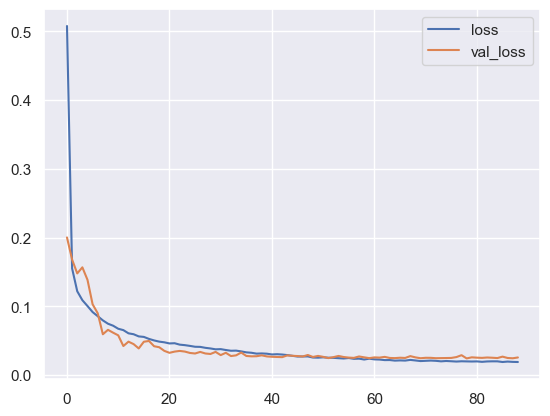

In [169]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [171]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [173]:
results.loc['Deep Neural Network'] = [
    round(mean_absolute_error(y_test, dnn_pred), 3),
    round(mean_squared_error(y_test, dnn_pred), 3),
    round(r2_score(y_test, dnn_pred), 3)
]
results

,MAE,MSE,R2-score
Linear Regression,0.183,0.058,0.638
Decision Tree,0.144,0.047,0.707
Random Forest,0.106,0.022,0.862
Support Vector Machines,0.132,0.034,0.787
K-nearest Neighbors,0.121,0.035,0.780
XGBoost,0.101,0.019,0.885
Deep Neural Network,0.116,0.026,0.838


In [175]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

Let's have a look at methods performing best as they R2-score close to 1 

In [180]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.101000,0.019000,0.885000
Random Forest,0.106000,0.022000,0.862000
Deep Neural Network,0.116000,0.026000,0.838000
Support Vector Machines,0.132000,0.034000,0.787000
K-nearest Neighbors,0.121000,0.035000,0.780000
Decision Tree,0.144000,0.047000,0.707000
Linear Regression,0.183000,0.058000,0.638000


# Conclusion

- Except linear regression model, all other models have mean absolute error less than 10% of mean of terget variable
- For this dataset, XGBoost and Random Forest algorithms have shown best results.